# Exploratory data analysis for $\tau\to \mu\nu\nu$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import minimize

from pdflib import normal, double_normal, exp_gauss_exp, exp_double_gauss_exp
from llhlib import loglh_maker, normalize
from plotlib import poisson_hist, fit_plot, plot_scatter
import glob
matplotlib.rcParams['font.size'] = 14

In [2]:
files = sorted(glob.glob('./csv/*.csv'))
print('\n'.join(files))

./csv/taumuthr.csv
./csv/tup.csv
./csv/tupd0gamgam.csv
./csv/tupdbltau.csv
./csv/tupdpkpipi.csv
./csv/tupfulldkpidgg.csv


In [3]:
df = pd.read_csv(files[0])
df.shape

(127671, 15)

In [4]:
df.columns

Index(['Unnamed: 0', 'evtn', 'tau_pi_p', 'tau_pi_pt', 'tau_pi_costh',
       'tau_pi_dedx', 'tau_pi_pidkpi', 'tau_pi_pidkp', 'tau_pi_pidmupi',
       'tau_pi_pide', 'tau_pi_charge', 'tau_pi_px_mc', 'tau_pi_py_mc',
       'tau_pi_pz_mc', 'tau_pi_pdgid_mc'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,evtn,tau_pi_p,tau_pi_pt,tau_pi_costh,tau_pi_dedx,tau_pi_pidkpi,tau_pi_pidkp,tau_pi_pidmupi,tau_pi_pide,tau_pi_charge,tau_pi_px_mc,tau_pi_py_mc,tau_pi_pz_mc,tau_pi_pdgid_mc
0,0,0,0.711757,0.704027,-0.146983,500.502747,0.982071,14.0,17.774511,0.0,1.0,-0.161599,0.685592,-0.106126,211.0
1,1,0,0.000000,0.000000,NaN,0.000000,0.960897,4.0,10.285098,0.0,-1.0,-0.305835,0.093459,0.170047,13.0
2,2,1,0.381669,0.307896,-0.590949,428.694336,-1.000000,2.0,0.565743,0.0,1.0,0.258055,0.167764,-0.223539,211.0
3,3,1,0.340336,0.161308,0.880543,601.912415,0.000000,0.0,0.000000,0.0,-1.0,0.140516,-0.075606,0.295445,-211.0
4,4,2,0.000000,0.000000,NaN,0.000000,0.987016,25.0,25.175167,0.0,1.0,0.539237,0.434145,0.539095,211.0


In [6]:
df = df.dropna()

In [7]:
df.head()

,Unnamed: 0,evtn,tau_pi_p,tau_pi_pt,tau_pi_costh,tau_pi_dedx,tau_pi_pidkpi,tau_pi_pidkp,tau_pi_pidmupi,tau_pi_pide,tau_pi_charge,tau_pi_px_mc,tau_pi_py_mc,tau_pi_pz_mc,tau_pi_pdgid_mc
0,0,0,0.711757,0.704027,-0.146983,500.502747,0.982071,14.0,17.774511,0.0,1.0,-0.161599,0.685592,-0.106126,211.0
2,2,1,0.381669,0.307896,-0.590949,428.694336,-1.000000,2.0,0.565743,0.0,1.0,0.258055,0.167764,-0.223539,211.0
3,3,1,0.340336,0.161308,0.880543,601.912415,0.000000,0.0,0.000000,0.0,-1.0,0.140516,-0.075606,0.295445,-211.0
5,5,2,0.596903,0.511387,-0.515760,441.106018,0.984431,22.0,21.885609,0.0,-1.0,0.440044,0.257627,-0.308306,13.0
6,6,3,0.399839,0.366973,0.397036,460.289398,0.966666,14.0,13.293715,0.0,1.0,-0.364191,0.044590,0.161202,-13.0


In [8]:
df.shape

(108882, 15)

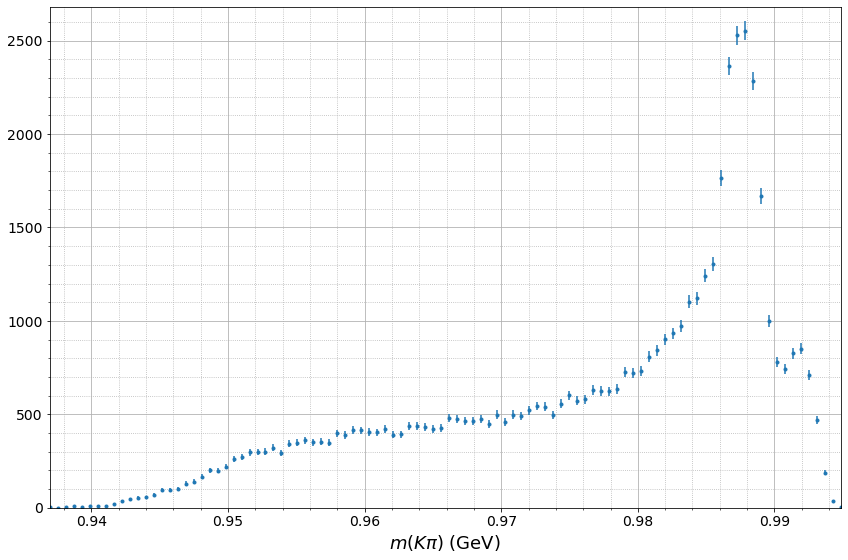

In [10]:
poisson_hist(df.tau_pi_pidkpi[df.tau_pi_pidkpi>0], xlabel=r'$m(K\pi)$ (GeV)');

array([[<AxesSubplot:title={'center':'tau_pi_pdgid_mc'}>]], dtype=object)

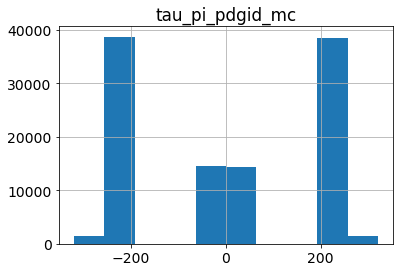

In [13]:
df.hist('tau_pi_pdgid_mc')

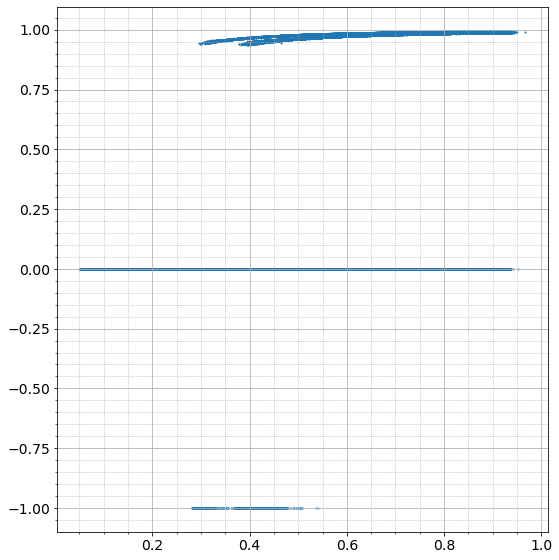

In [14]:
plot_scatter(df.tau_pi_p, df.tau_pi_pidkpi, '', '');